In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [3]:
x

array([[-1.04436687,  7.55812504],
       [-5.48952791, -2.73703535],
       [-6.36778974, -2.69288968],
       ...,
       [ 4.77808508,  7.84260944],
       [-1.78319624,  8.73758699],
       [-1.4897996 ,  6.96035191]], shape=(1000, 2))

In [4]:
y

array([0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0,
       0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2,

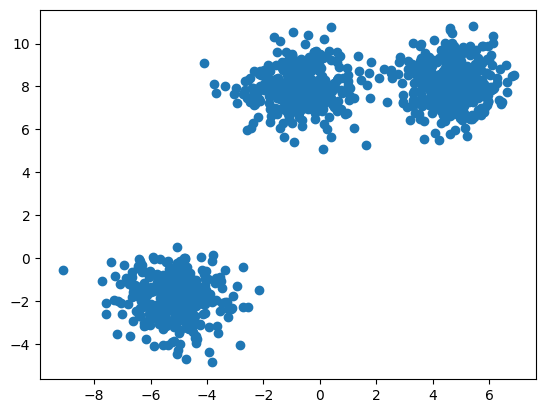

In [5]:
plt.scatter(x[:,0],x[:,-1])

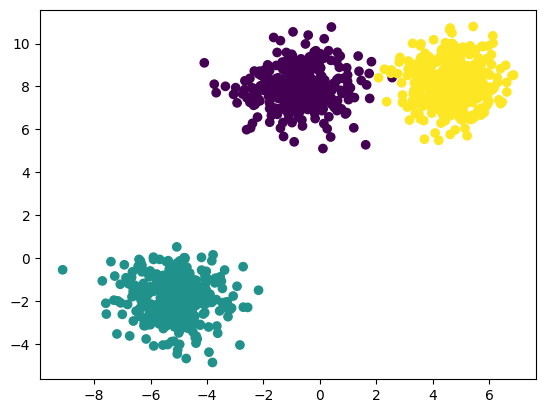

In [6]:
plt.scatter(x[:,0],x[:,-1],c=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    cluster=KMeans(n_clusters=k,init="k-means++")
    cluster.fit(x_train_scaled)
    print(cluster.inertia_)
    wcss.append(cluster.inertia_)


1499.9999999999993
296.05576945321275
74.87203958428023
67.01974431795604
60.78253193814272
46.99507763941556
45.49339024645264
42.50745833903624
34.71384049159848
31.01305953518232


In [10]:
wcss

[1499.9999999999993,
 296.05576945321275,
 74.87203958428023,
 67.01974431795604,
 60.78253193814272,
 46.99507763941556,
 45.49339024645264,
 42.50745833903624,
 34.71384049159848,
 31.01305953518232]

<function matplotlib.pyplot.show(close=None, block=None)>

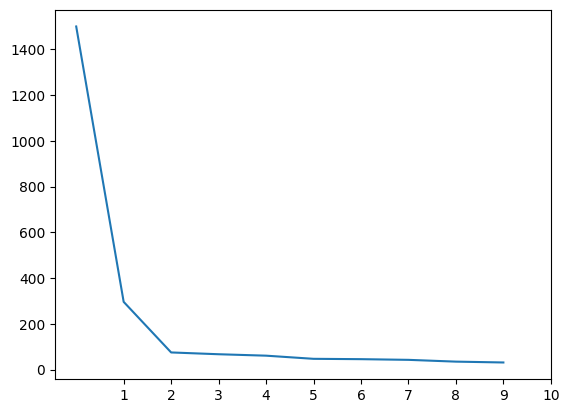

In [11]:
plt.plot(wcss)
plt.xticks(range(1,11))
plt.show

In [12]:
cluster1=KMeans(n_clusters=2,init="k-means++")
cluster1.fit(x_train_scaled)
y_pred=cluster1.predict(x_test_scaled)
y_pred_train=cluster1.predict(x_train_scaled)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

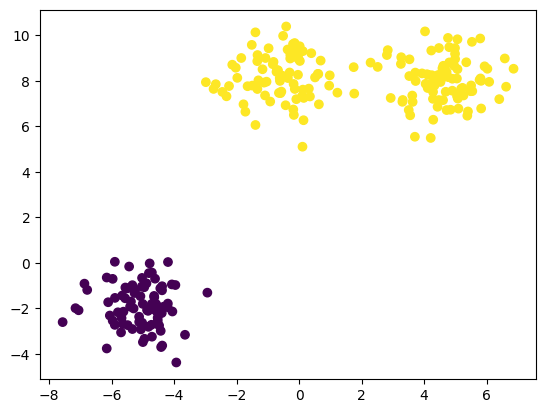

In [13]:
plt.scatter(x_test[:,0],x_test[:,-1],c=y_pred)

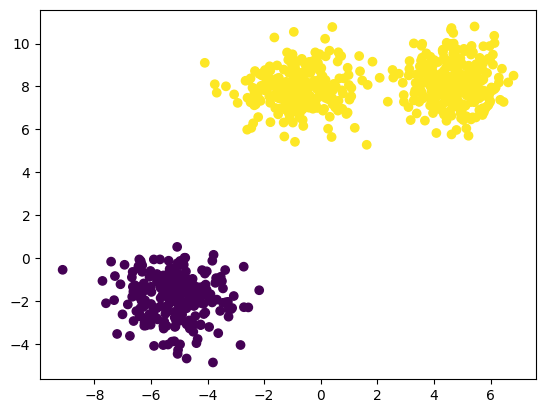

In [14]:
plt.scatter(x_train[:,0],x_train[:,-1],c=y_pred_train)

In [15]:
! pip install kneed

In [16]:
from kneed import KneeLocator
k=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

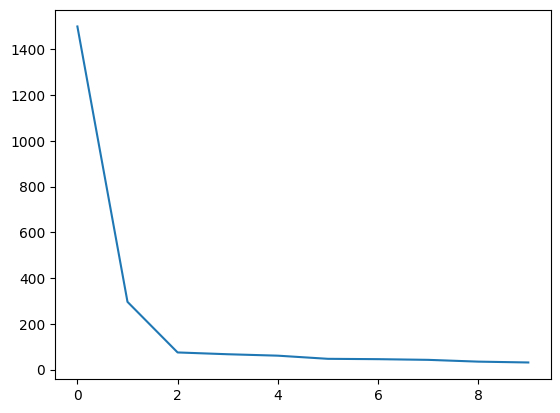

In [17]:
plt.plot(wcss)

In [18]:
k.elbow


np.int64(3)

In [23]:
centroids = cluster1.cluster_centers_
centroids

array([[-1.13476864, -1.37972161],
       [ 0.57079545,  0.69400826]])

C:\Users\prasa\AppData\Local\Temp\ipykernel_16004\2714440744.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', s=30)


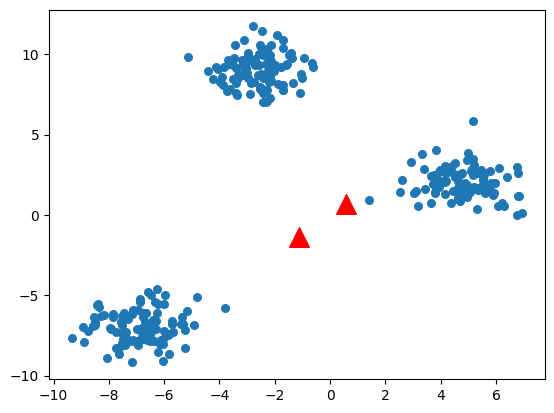

In [36]:
centroids =cluster1.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=200, label='Centroids')

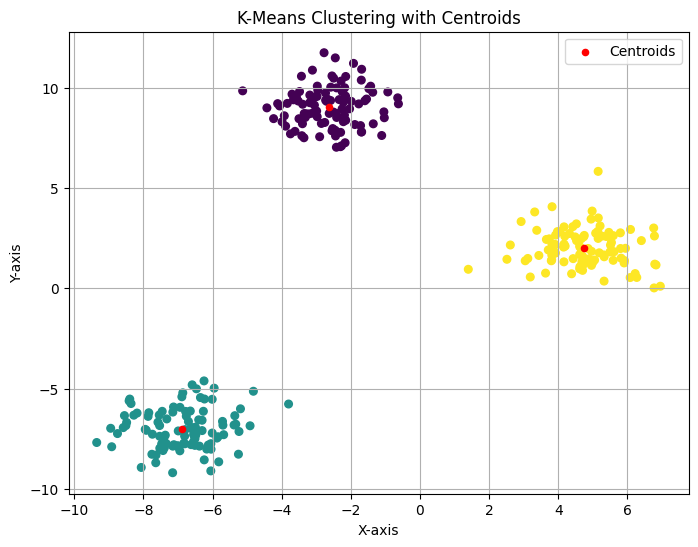

In [31]:
#copilet code
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data (similar to your image)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)

# Mark centroids with red "X"
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=20, c='red', label='Centroids')

plt.title("K-Means Clustering with Centroids")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()
